In [1]:
import numpy as np
from scipy.fft import dst, dct, fft
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 
from PIL import Image

STYLE = "#ffffff"

from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# list(plt.style.available)

In [3]:
def load_images(path, samples):
    data = []
    for index, file in enumerate(os.listdir(path)):
        if index < samples + 1:
            image = Image.open("data/image-data/" + file)
            image.load()
            data.append(np.asarray(image, dtype="int32"))
    return data

data = load_images("data/image-data", 2)

In [4]:
class NDStandardScaler(TransformerMixin):
    def __init__(self, **kwargs):
        self._scaler = MinMaxScaler((-128,127), copy=True, **kwargs)
        self._orig_shape = None

    def fit(self, X, **kwargs):
        X = np.array(X)
        # Save the original shape to reshape the flattened X later
        # back to its original shape
        if len(X.shape) > 1:
            self._orig_shape = X.shape[1:]
        X = self._flatten(X)
        self._scaler.fit(X, **kwargs)
        return self

    def transform(self, X, **kwargs):
        X = np.array(X)
        X = self._flatten(X)
        X = self._scaler.transform(X, **kwargs)
        X = self._reshape(X)
        return X

    def _flatten(self, X):
        # Reshape X to <= 2 dimensions
        if len(X.shape) > 2:
            n_dims = np.prod(self._orig_shape)
            X = X.reshape(-1, n_dims)
        return X

    def _reshape(self, X):
        # Reshape X back to it's original shape
        if len(X.shape) >= 2:
            X = X.reshape(-1, *self._orig_shape)
        return X # np.around(X).astype(int)

scaler = NDStandardScaler()

scaled_data = scaler.fit_transform(data)

print(np.amin(scaled_data))
print(np.amax(scaled_data))

-128.0
-128.0


In [5]:
data = data[0]

In [6]:
scaler = NDStandardScaler()

scaled_data = scaler.fit_transform(data)

In [7]:
scaled_data.shape

(1920, 1280, 3)

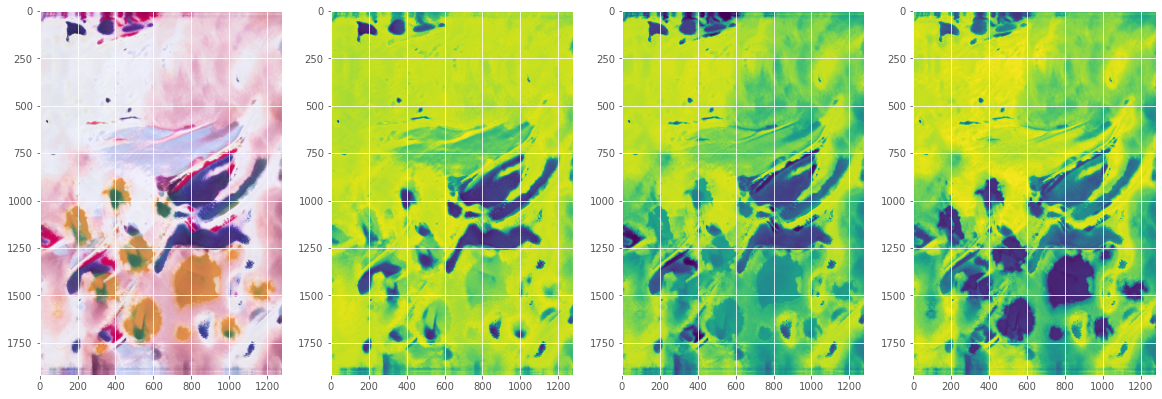

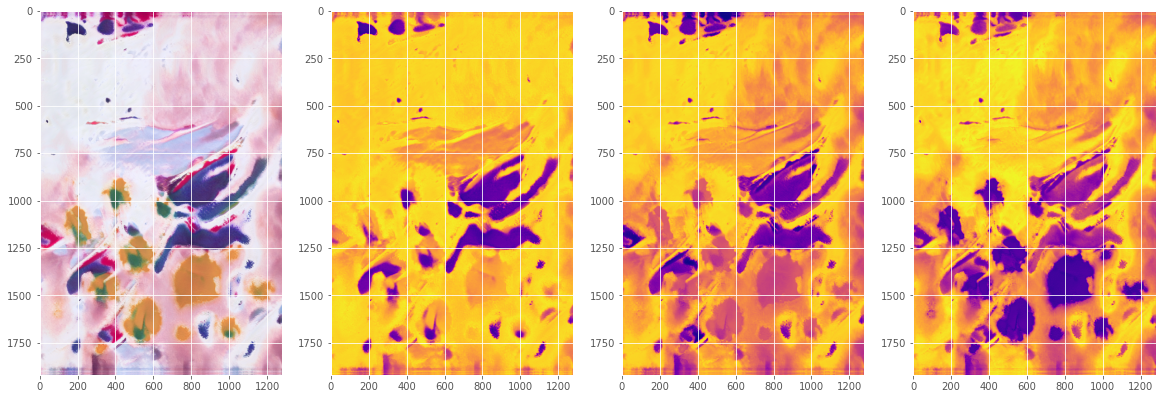

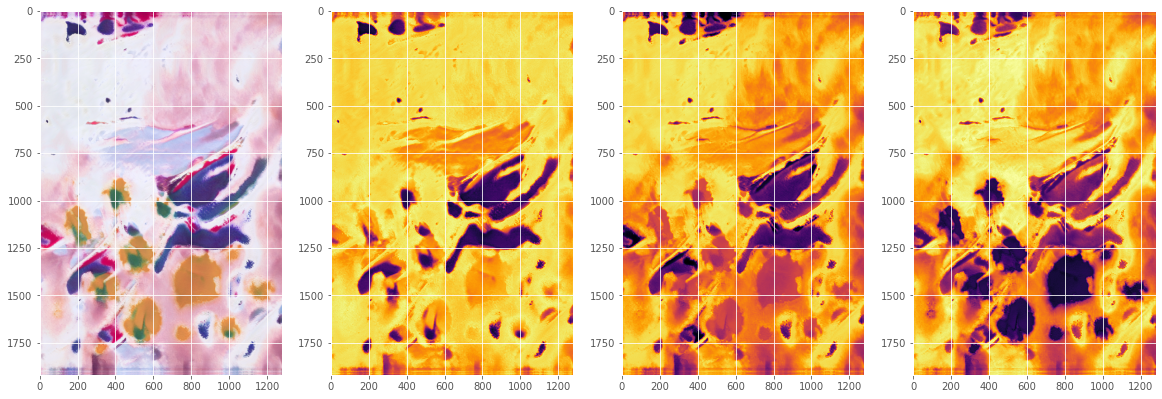

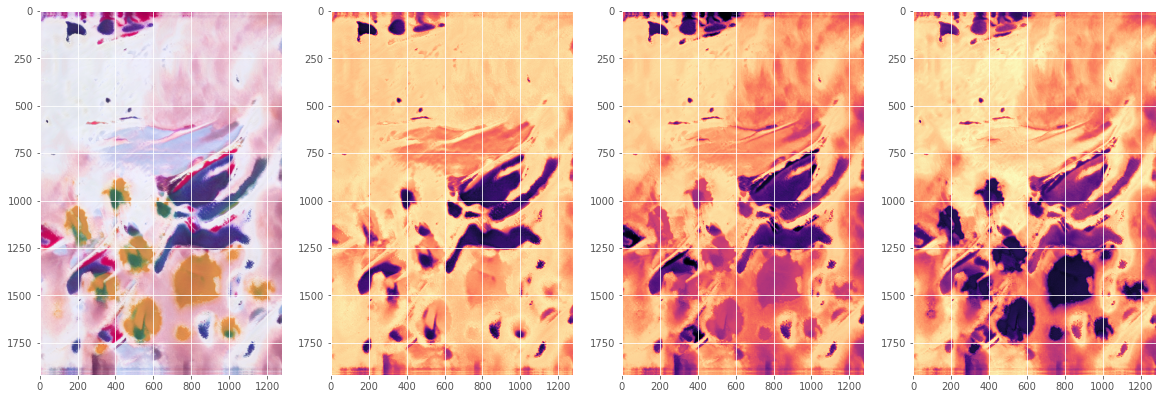

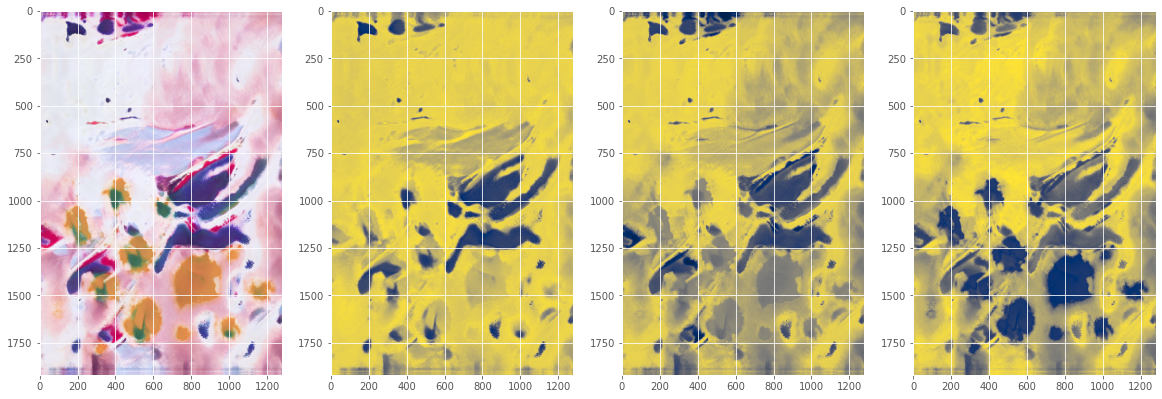

In [8]:
for style in ['viridis', 'plasma', 'inferno', 'magma', 'cividis']:
    fig, axes = plt.subplots(1, 4, figsize=(20, 20), facecolor = (STYLE))
    axes[0].imshow(data, cmap=style)
    axes[1].imshow(data[:,:,0], cmap=style)
    axes[2].imshow(data[:,:,1], cmap=style)
    axes[3].imshow(data[:,:,2], cmap=style)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


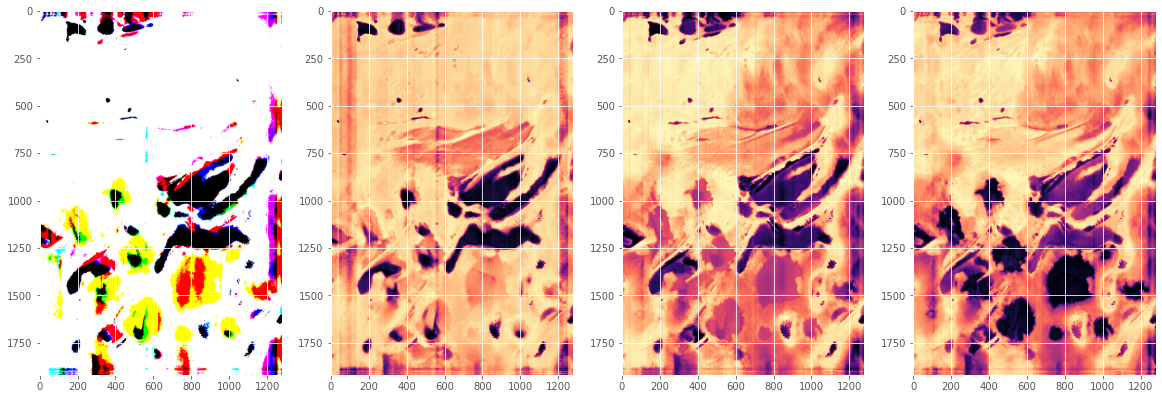

In [39]:
fig, axes = plt.subplots(1, 4, figsize=(20, 20), facecolor = (STYLE))

axes[0].imshow(scaled_data, cmap="magma")
axes[1].imshow(scaled_data[:,:,0], cmap="magma")
axes[2].imshow(scaled_data[:,:,1], cmap="magma")
axes[3].imshow(scaled_data[:,:,2], cmap="magma") #  [ 'viridis', 'plasma', 'inferno', 'magma', 'cividis']

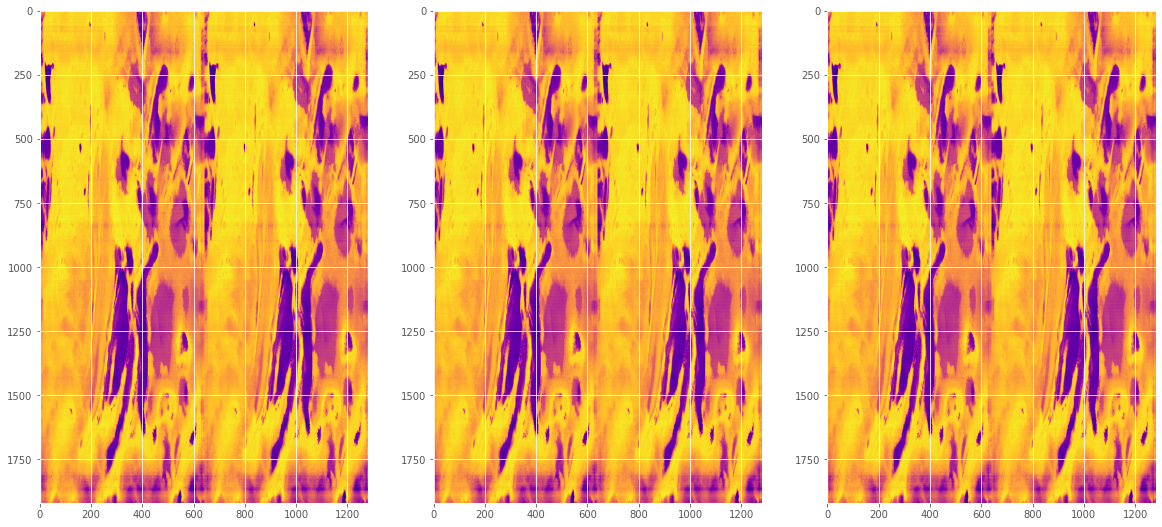

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(20, 20), facecolor = (STYLE))

prueba = np.concatenate((scaled_data[:,:,0].T, scaled_data[:,:,1].T, scaled_data[:,:,2].T), axis = 1).reshape((1920, 1280, 3))

axes[0].imshow(prueba[:,:,0], cmap="plasma")
axes[1].imshow(prueba[:,:,1], cmap="plasma")
axes[2].imshow(prueba[:,:,2], cmap="plasma")

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 20), facecolor = (STYLE))

test = np.concatenate((prueba[:,:,0].T, prueba[:,:,1].T, prueba[:,:,2].T), axis = 1).reshape((1920, 1280, 3))

axes[0].imshow(test[:,:,0], cmap="plasma")
axes[1].imshow(test[:,:,1], cmap="plasma")
axes[2].imshow(test[:,:,2], cmap="plasma")

In [ ]:
STYLE = "#ffffff"

rows = 3

fig, axes = plt.subplots(rows, 1, figsize=(25, rows * 10), facecolor = (STYLE))

for row in range(rows):
    axes[row].plot(scaled_data[row], linewidth=1); axes[row].set_title(f'Row Number {row}')
    axes[row].scatter(np.repeat(np.arange(scaled_data[row].shape[0]),3).reshape((1150, 3)), # Creates 3 arrays for the Xs
                      scaled_data[row],
                      linewidth=1,
                      marker = '.',
                      color= "black"); axes[row].set_title(f'Discrete Cosine Transform Row Number {row}')

In [ ]:
pd.DataFrame(scaled_data[0]).T.head(3)

In [ ]:
def gen(x):
   i = 2
   for n in range(x + 1):
       yield i
       i <<= 1

In [ ]:
for frequency in list(gen(3)): #[0.25, 0.5, 1 , 2 , 4 , 8 , 16, 128, 512, 2048]:
    
    rango = 1000
    x = np.arange(rango)
    y = np.cos(((2*x+1)*np.pi*frequency)/rango*2) # amplitud?

    array = np.array((x,y)).T

    transform = dct(y, axis=0)

    fig, axes = plt.subplots(3, 1, figsize=(25, 15), facecolor = (STYLE))

    axes[0].plot(array[:,0], array[:,1], linewidth=1); axes[0].set_title(f'Wave on frequency {frequency}')
    axes[1].scatter(array[:,0], array[:,1], linewidth=1, marker = "."); axes[1].set_title(f'Discrete points on frequency {frequency}')
    axes[2].plot(transform, linewidth=1); axes[2].set_title(f'Discrete Cosine Transform frequency {frequency}')

In [ ]:
rows= 3

fig, axes = plt.subplots(rows, 1, figsize=(25, rows * 10), facecolor = (STYLE))

for row in range(rows):
    discrete_cosine_transform = dct(scaled_data[row])
    axes[row].plot(discrete_cosine_transform, linewidth=1); axes[row].set_title(f'Discrete Cosine Transform Row Number {row}')
    axes[row].scatter(np.repeat(np.arange(discrete_cosine_transform.shape[0]),3).reshape((1150, 3)), # Creates 3 arrays for the Xs
                      discrete_cosine_transform,
                      linewidth=1,
                      marker = '.',
                      color= "black"); axes[row].set_title(f'Discrete Cosine Transform Row Number {row}')

In [ ]:
discrete_cosine_transform = dct(data[0])

discrete_cosine_transform.shape

In [ ]:
discrete_cosine_transform = dst(scaled_data)

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 20), facecolor = (STYLE))

discrete_cosine_transform = dst(scaled_data)

axes[0].imshow(discrete_cosine_transform, cmap="magma")
axes[1].imshow(discrete_cosine_transform[:,:,0], cmap="magma")
axes[2].imshow(discrete_cosine_transform[:,:,1], cmap="magma")
axes[3].imshow(discrete_cosine_transform[:,:,2], cmap="magma") #  [ 'viridis', 'plasma', 'inferno', 'magma', 'cividis']

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 20), facecolor = (STYLE))

discrete_cosine_transform = dct(scaled_data)

axes[0].imshow(discrete_cosine_transform, cmap="magma")
axes[1].imshow(discrete_cosine_transform[:,:,0], cmap="magma")
axes[2].imshow(discrete_cosine_transform[:,:,1], cmap="magma")
axes[3].imshow(discrete_cosine_transform[:,:,2], cmap="magma") #  [ 'viridis', 'plasma', 'inferno', 'magma', 'cividis']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


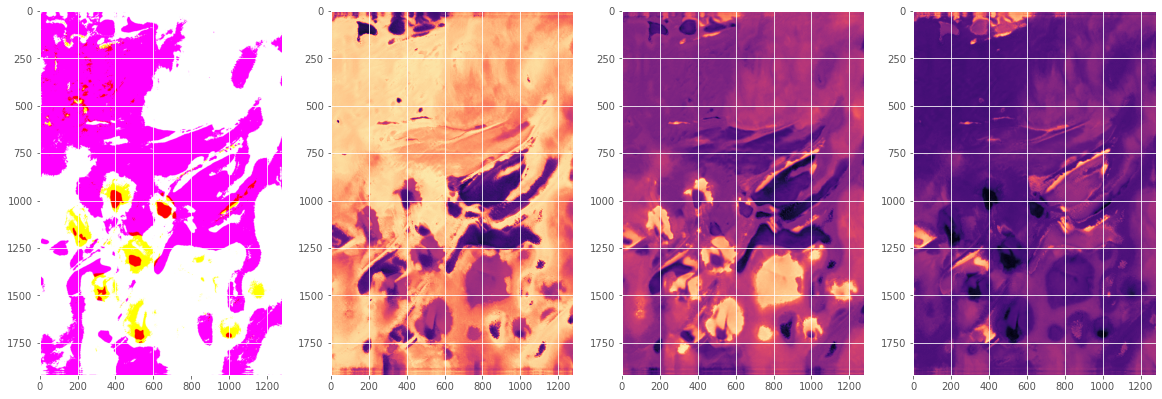

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(20, 20), facecolor = (STYLE))

discrete_cosine_transform = dct(data)

axes[0].imshow(discrete_cosine_transform, cmap="magma")
axes[1].imshow(discrete_cosine_transform[:,:,0], cmap="magma")
axes[2].imshow(discrete_cosine_transform[:,:,1], cmap="magma")
axes[3].imshow(discrete_cosine_transform[:,:,2], cmap="magma")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


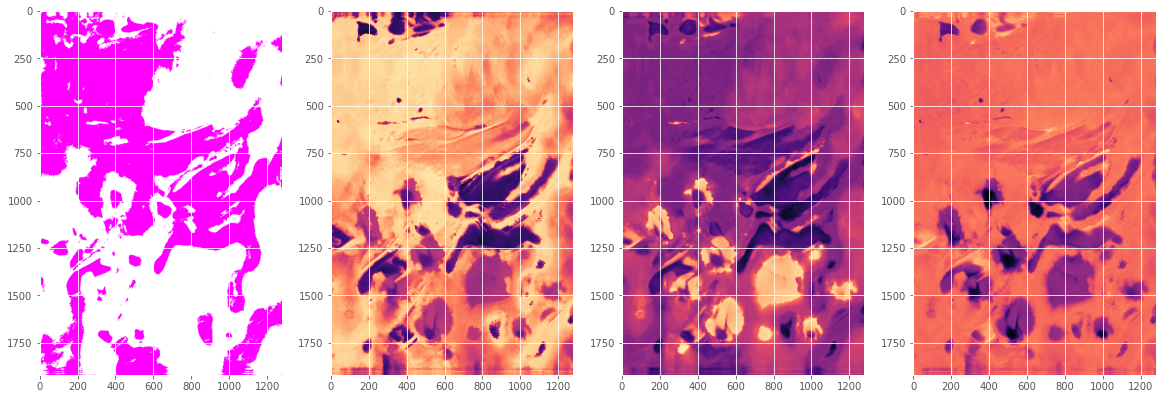

In [45]:
fig, axes = plt.subplots(1, 4, figsize=(20, 20), facecolor = (STYLE))

discrete_cosine_transform = dst(data)

axes[0].imshow(discrete_cosine_transform, cmap="magma")
axes[1].imshow(discrete_cosine_transform[:,:,0], cmap="magma")
axes[2].imshow(discrete_cosine_transform[:,:,1], cmap="magma")
axes[3].imshow(discrete_cosine_transform[:,:,2], cmap="magma")

In [46]:
# fig, axes = plt.subplots(1, 4, figsize=(20, 20), facecolor = (STYLE))

discrete_cosine_transform = fft(data)

#axes[0].imshow(discrete_cosine_transform, cmap="magma")
# axes[1].imshow(discrete_cosine_transform[:,:,0], cmap="magma")
# axes[2].imshow(discrete_cosine_transform[:,:,1], cmap="magma")
# axes[3].imshow(discrete_cosine_transform[:,:,2], cmap="magma")

discrete_cosine_transform.shape

(1920, 1280, 3)

In [47]:
## convos

In [48]:
def compute_convolution(img, kernel):
    # Parameters
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape

    img = np.squeeze(img) # Removes dimensions of size 1
    img_height, img_width = img.shape
    
    array = []

    for x in range(img_height - kernel_height):
        arr = []
        
        for y in range(img_width - kernel_width):
            
            a = np.multiply(img[x: x + kernel_height, y: y + kernel_width], kernel)
            arr.append(a.sum())
            
        array.append(arr)
        
    return array

In [49]:
identity_kernel = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]

In [ ]:
output = compute_convolution(data[:,:,0], identity_kernel)

plt.imshow(data, cmap='gray')
plt.show()

plt.imshow(output, cmap='gray')
plt.show()

In [ ]:
def plot_convolution(img, kernel, activation=False):
    ''' The following printing function ease the visualization'''
    
    img = np.squeeze(img)
    output_img = compute_convolution(img, kernel)
    if activation:
        output_img = np.maximum(output_img, 0)
    
    plt.figure(figsize=(10, 5))
    
    ax1 = plt.subplot2grid((3,3),(0,0), rowspan=3)
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text('Input image')
    
    ax2 = plt.subplot2grid((3,3),(1, 1))
    ax2.imshow(kernel, cmap='gray')
    ax2.title.set_text('Kernel')    
    
    ax3 = plt.subplot2grid((3,3),(0, 2), rowspan=3)
    ax3.imshow(output_img, cmap='gray')
    ax3.title.set_text('Output image')    

    for ax in [ax1, ax2, ax3]:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    plt.show()

In [ ]:
kernel_2 = [
    [-1, -1, -1],
    [0, 0, 0],   
    [1, 1, 1],
]

kernel_3 = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

kernel_4 = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

In [ ]:
plot_convolution(data[:,:,0], kernel_2, activation=True)
plot_convolution(data[:,:,0], kernel_3, activation=True)
plot_convolution(data[:,:,0], kernel_4, activation=True)

In [ ]:
plot_convolution(data[:,:,1], kernel_2, activation=True)
plot_convolution(data[:,:,1], kernel_3, activation=True)
plot_convolution(data[:,:,1], kernel_4, activation=True)

In [ ]:
plot_convolution(data[:,:,2], kernel_2, activation=True)
plot_convolution(data[:,:,2], kernel_3, activation=True)
plot_convolution(data[:,:,2], kernel_4, activation=True)